# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
api_key = "b91c8aaf78c0d69f67c7d7f10e2e68c3"
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | olonkinbyen
Processing Record 3 of Set 1 | tamanrasset
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | saldanha
Processing Record 8 of Set 1 | itaguai
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | carolina beach
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | qaqortoq
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | sovetskaya gavan'
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | cockburn town
Processing Record 21 of Set 1 | oranjemund
Processing Record 22 of Set 1 | taiohae
City not

Processing Record 40 of Set 4 | isafjordur
Processing Record 41 of Set 4 | magadan
Processing Record 42 of Set 4 | al jahra'
Processing Record 43 of Set 4 | enewetak
Processing Record 44 of Set 4 | camana
Processing Record 45 of Set 4 | kodiak
Processing Record 46 of Set 4 | khetri
Processing Record 47 of Set 4 | juybar
Processing Record 48 of Set 4 | ljubuski
Processing Record 49 of Set 4 | shashemene
Processing Record 0 of Set 5 | kataragama
City not found. Skipping...
Processing Record 1 of Set 5 | mejit
Processing Record 2 of Set 5 | chunskiy
Processing Record 3 of Set 5 | rundu
Processing Record 4 of Set 5 | san andres
Processing Record 5 of Set 5 | hammerfest
Processing Record 6 of Set 5 | koelwar
Processing Record 7 of Set 5 | colonia menno
Processing Record 8 of Set 5 | mount isa
Processing Record 9 of Set 5 | constantia
Processing Record 10 of Set 5 | puerto deseado
Processing Record 11 of Set 5 | dudinka
Processing Record 12 of Set 5 | selkirk
Processing Record 13 of Set 5 | 

Processing Record 32 of Set 8 | mount pleasant
Processing Record 33 of Set 8 | az zubayr
Processing Record 34 of Set 8 | cascais
Processing Record 35 of Set 8 | ambridge
Processing Record 36 of Set 8 | tinghir
Processing Record 37 of Set 8 | noumea
Processing Record 38 of Set 8 | laojunmiao
Processing Record 39 of Set 8 | chechat
Processing Record 40 of Set 8 | outjo
Processing Record 41 of Set 8 | yaounde
Processing Record 42 of Set 8 | aginskoye
Processing Record 43 of Set 8 | mountain home
Processing Record 44 of Set 8 | selizharovo
Processing Record 45 of Set 8 | wodonga
Processing Record 46 of Set 8 | terra santa
Processing Record 47 of Set 8 | arraias
Processing Record 48 of Set 8 | howard springs
Processing Record 49 of Set 8 | kone
Processing Record 0 of Set 9 | taltal
Processing Record 1 of Set 9 | bad sooden-allendorf
Processing Record 2 of Set 9 | sapatgram
Processing Record 3 of Set 9 | villa gesell
Processing Record 4 of Set 9 | okha
Processing Record 5 of Set 9 | tres arr

Processing Record 23 of Set 12 | esquel
Processing Record 24 of Set 12 | manggar
Processing Record 25 of Set 12 | gulf shores
Processing Record 26 of Set 12 | mthatha
Processing Record 27 of Set 12 | tazacorte
Processing Record 28 of Set 12 | inhambane
Processing Record 29 of Set 12 | freeport
Processing Record 30 of Set 12 | fort-shevchenko
Processing Record 31 of Set 12 | santa cruz do capibaribe
Processing Record 32 of Set 12 | yaren
Processing Record 33 of Set 12 | arraial do cabo
Processing Record 34 of Set 12 | kas
Processing Record 35 of Set 12 | barcelos
Processing Record 36 of Set 12 | adamovka
Processing Record 37 of Set 12 | horqueta
Processing Record 38 of Set 12 | palikir - national government center
Processing Record 39 of Set 12 | nuku'alofa
Processing Record 40 of Set 12 | birzebbuga
Processing Record 41 of Set 12 | ciudad lazaro cardenas
Processing Record 42 of Set 12 | kratie
Processing Record 43 of Set 12 | tvoroyri
Processing Record 44 of Set 12 | san antonio
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,11.24,76,0,1.69,AU,1726520149
1,olonkinbyen,70.9221,-8.7187,0.80,79,100,4.56,SJ,1726520151
2,tamanrasset,22.7850,5.5228,24.95,57,40,2.06,DZ,1726520188
3,udachny,66.4167,112.4000,3.06,97,100,8.45,RU,1726520165
4,adamstown,-25.0660,-130.1015,19.27,85,100,9.83,PN,1726520146


In [6]:
# Export the City_Data into a csv
import os
output_dir = "output_data"
os.makedirs(output_dir, exist_ok=True)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,11.24,76,0,1.69,AU,1726520149
1,olonkinbyen,70.9221,-8.7187,0.80,79,100,4.56,SJ,1726520151
2,tamanrasset,22.7850,5.5228,24.95,57,40,2.06,DZ,1726520188
3,udachny,66.4167,112.4000,3.06,97,100,8.45,RU,1726520165
4,adamstown,-25.0660,-130.1015,19.27,85,100,9.83,PN,1726520146


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

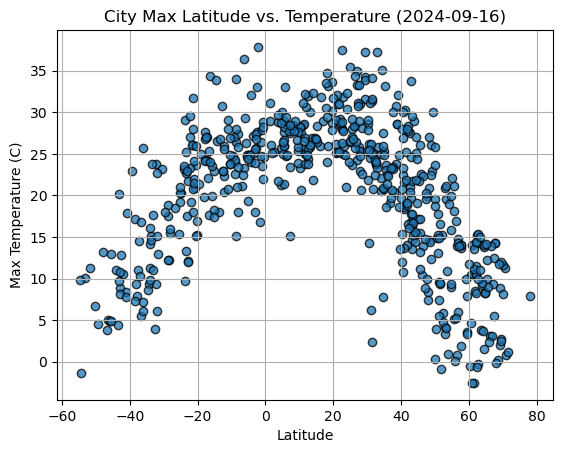

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-09-16)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

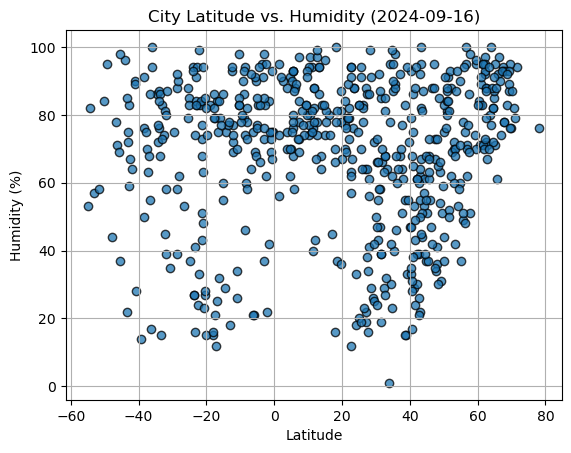

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-09-16)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

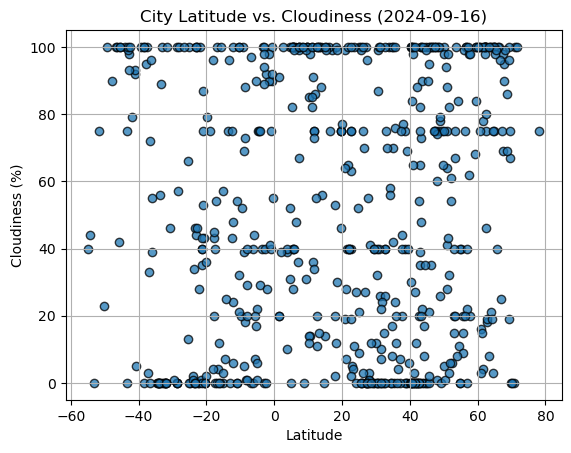

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-09-16)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

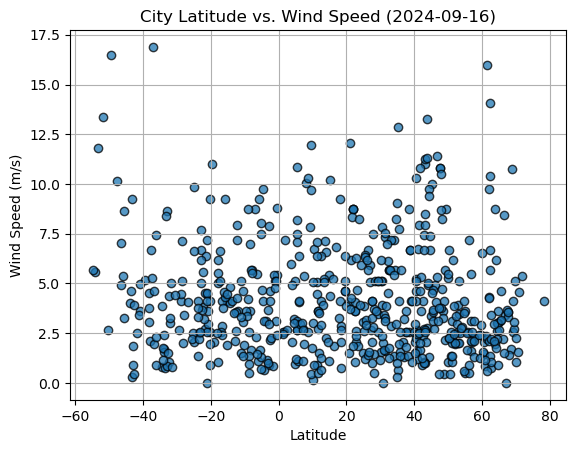

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-09-16)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.scatter(x_values, y_values, edgecolors="black", linewidths=1, marker="o", alpha=0.75)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (x_values.mean(), y_values.mean()), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    ply.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,0.80,79,100,4.56,SJ,1726520151
2,tamanrasset,22.7850,5.5228,24.95,57,40,2.06,DZ,1726520188
3,udachny,66.4167,112.4000,3.06,97,100,8.45,RU,1726520165
8,ilulissat,69.2167,-51.1000,2.01,87,100,2.57,GL,1726520157
11,carolina beach,34.0352,-77.8936,25.04,95,58,1.34,US,1726520211


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,11.24,76,0,1.69,AU,1726520149
4,adamstown,-25.0660,-130.1015,19.27,85,100,9.83,PN,1726520146
5,waitangi,-43.9535,-176.5597,11.01,96,100,4.02,NZ,1726520145
6,saldanha,-33.0117,17.9442,11.03,83,0,8.62,ZA,1726520205
7,itaguai,-22.8522,-43.7753,21.79,83,100,6.69,BR,1726520206


###  Temperature vs. Latitude Linear Regression Plot

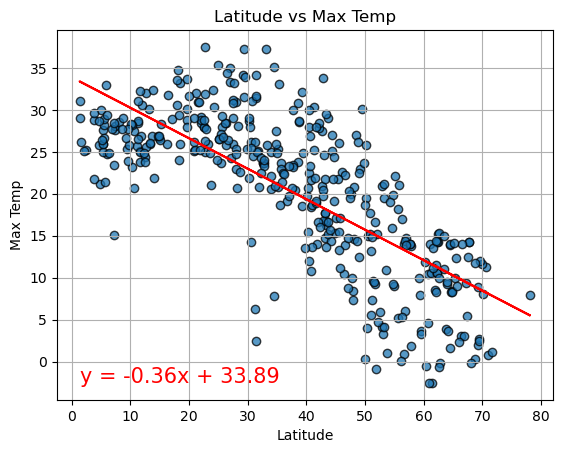

The R^2 value for Northern Hemisphere is: 0.5640963929911131


In [42]:
# Linear regression on Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
lat = ["northern_hemi_df"]
regress_values = slope * northern_hemi_df["Lat"] + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolors="black", linewidths=1, marker="o", alpha=0.75)
plt.plot(northern_hemi_df["Lat"], regress_values, "r-", label="Regression Line")
plt.annotate(line_eq, (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Max Temp"])), fontsize=15, color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)
plt.show()
r_squared = r_value ** 2
print(f"The R^2 value for Northern Hemisphere is: {r_squared}")


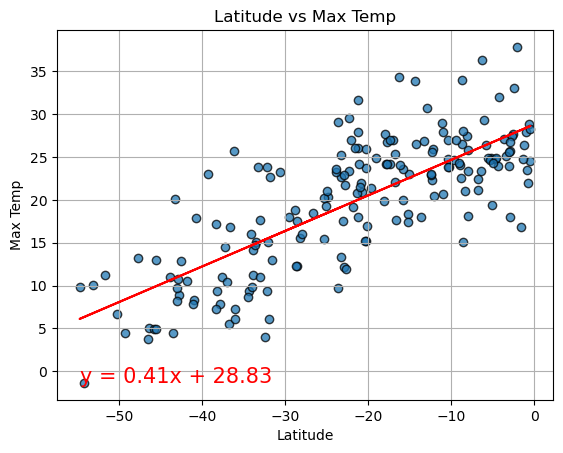

The R^2 value for Southern Hemisphere is: 0.5888133020580214


In [41]:
# Linear regression on Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
lat = ["southern_hemi_df"]
regress_values = slope * southern_hemi_df["Lat"] + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolors="black", linewidths=1, marker="o", alpha=0.75)
plt.plot(southern_hemi_df["Lat"], regress_values, "r-", label="Regression Line")
plt.annotate(line_eq, (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Max Temp"])), fontsize=15, color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)
plt.show()
r_squared = r_value ** 2
print(f"The R^2 value for Southern Hemisphere is: {r_squared}")


**Discussion about the linear relationship:** The linear regression on Northern Hemisphere, tells us that there is a positive correlation between latitude and temperature. In the Southern Hemisphere, as the latitude moves from more negative values closer to the South Pole to 0, the temperature tends to rise. Regions closer to the equator generally receive more direct sunlight, leading to higher temperatures.

### Humidity vs. Latitude Linear Regression Plot

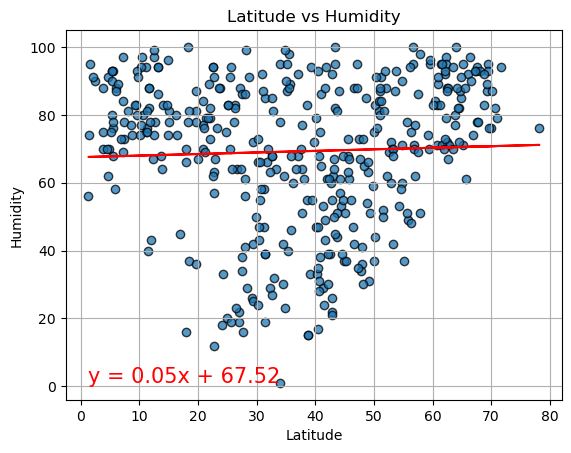

The R^2 value for Northern Hemisphere is: 0.0016167199977655791


In [43]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
lat = ["northern_hemi_df"]
regress_values = slope * northern_hemi_df["Lat"] + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.75)
plt.plot(northern_hemi_df["Lat"], regress_values, "r-", label="Regression Line")
plt.annotate(line_eq, (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Humidity"])), fontsize=15, color="red")
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.show()
r_squared = r_value ** 2
print(f"The R^2 value for Northern Hemisphere is: {r_squared}")

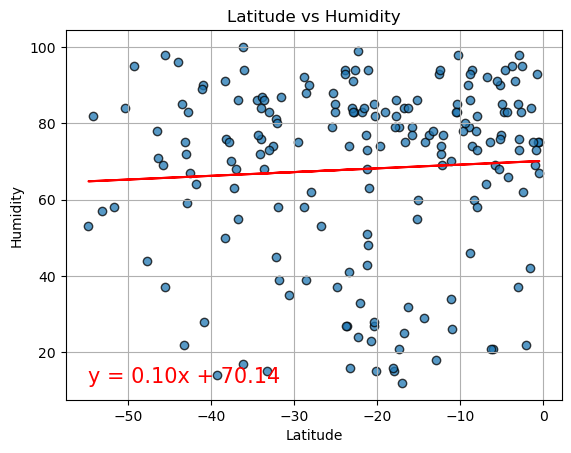

The R^2 value for Southern Hemisphere is: 0.003435083850316762


In [44]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
lat = ["southern_hemi_df"]
regress_values = slope * southern_hemi_df["Lat"] + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolors="black", linewidths=1, marker="o", alpha=0.75)
plt.plot(southern_hemi_df["Lat"], regress_values, "r-", label="Regression Line")
plt.annotate(line_eq, (min(southern_hemi_df["Lat"]), min(southern_hemi_df["Humidity"])), fontsize=15, color="red")
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.show()
r_squared = r_value ** 2
print(f"The R^2 value for Southern Hemisphere is: {r_squared}")

**Discussion about the linear relationship:** The linear regression tells us that as the latitude moves near the equator (low latitude) often have higher humidity due to the warmer temperatures.

### Cloudiness vs. Latitude Linear Regression Plot

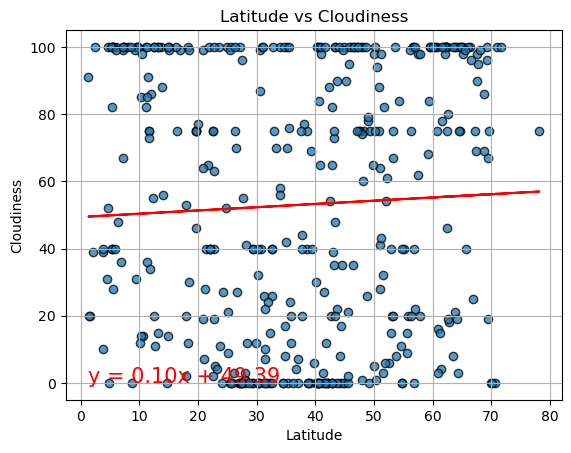

The R^2 value for Northern Hemisphere is: 0.0021785706889452146


In [59]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
lat = ["northern_hemi_df"]
regress_values = slope * northern_hemi_df["Lat"] + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", alpha=0.75)
plt.plot(northern_hemi_df["Lat"], regress_values, "r-", label="Regression Line")
plt.annotate(line_eq, (min(northern_hemi_df["Lat"]), min(northern_hemi_df["Cloudiness"])), fontsize=15, color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.show()
r_squared = r_value ** 2
print(f"The R^2 value for Northern Hemisphere is: {r_squared}")

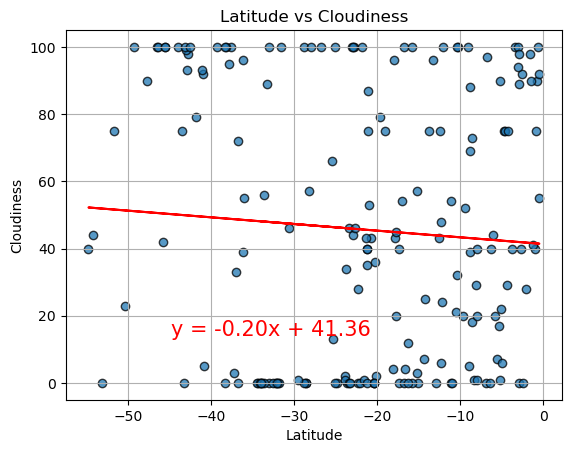

The R^2 value for Southern Hemisphere is: 0.0049801758751154175


In [57]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
lat = ["southern_hemi_df"]
regress_values = slope * southern_hemi_df["Lat"] + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", alpha=0.75)
plt.plot(southern_hemi_df["Lat"], regress_values, "r-", label="Regression Line")
plt.annotate(line_eq, (min(southern_hemi_df["Lat"])+10, min(southern_hemi_df["Cloudiness"])+14), fontsize=15, color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.show()
r_squared = r_value ** 2
print(f"The R^2 value for Southern Hemisphere is: {r_squared}")

**Discussion about the linear relationship:** These values suggest a very weak linear relationship between latitude and cloudiness. Both R values are closer to zero. The latitude of a location tells us very little about how cloudy it will be.

### Wind Speed vs. Latitude Linear Regression Plot

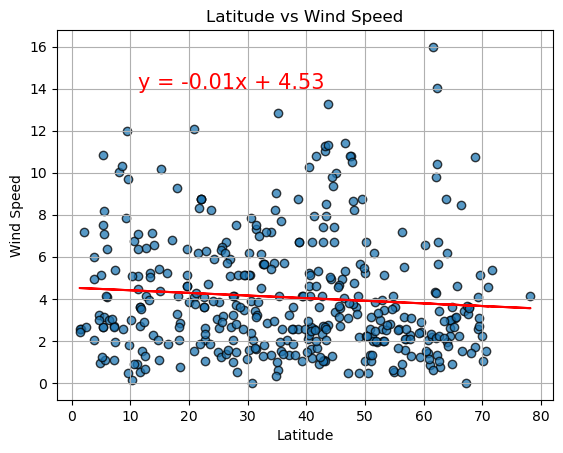

The R^2 value for Northern Hemisphere is: 0.007064668722132396


In [53]:
# Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
lat = ["northern_hemi_df"]
regress_values = slope * northern_hemi_df["Lat"] + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o", alpha=0.75)
plt.plot(northern_hemi_df["Lat"], regress_values, "r-", label="Regression Line")
plt.annotate(line_eq, (min(northern_hemi_df["Lat"])+10, min(northern_hemi_df["Wind Speed"])+14), fontsize=15, color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.show()
r_squared = r_value ** 2
print(f"The R^2 value for Northern Hemisphere is: {r_squared}")

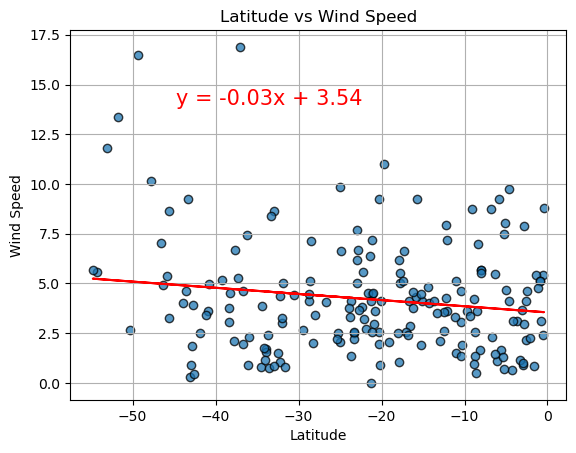

The R^2 value for Southern Hemisphere is: 0.023955681430183576


In [58]:
# Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
lat = ["southern_hemi_df"]
regress_values = slope * southern_hemi_df["Lat"] + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolors="black", linewidths=1, marker="o", alpha=0.75)
plt.plot(southern_hemi_df["Lat"], regress_values, "r-", label="Regression Line")
plt.annotate(line_eq, (min(southern_hemi_df["Lat"])+10, min(southern_hemi_df["Wind Speed"])+14), fontsize=15, color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.show()
r_squared = r_value ** 2
print(f"The R^2 value for Southern Hemisphere is: {r_squared}")

**Discussion about the linear relationship:** Both R values are very close to zero. The latitude of a location provides almost no insight into the wind speed.